# SHAP

从我接触 Machine Learning 开始，就一直遇到人问，每个变量对最终模型的影响是什么样的，能给出解释么。次数一多，我就想说，解释个锤子。对于当下这个时代，针对复杂的模型的变量解释问题，就和问别人宇宙是如何诞生的一样，是一个还没有答案的问题。很多人致力于改善这个现状，很多出现的新的工具还在初级阶段，可是很多人就宣传这些工具好用的不得了，那些不带脑子的人看到宣传之后，就会认为捡到了宝，这些人往往自己不亲自去做，会取要求别人来帮他们看看他们捡到的宝。SHAP，就是这样一个工具。**用来玩玩还可以，千万别当真，至少现在这个阶段别当真**。除了输出的图表好看，暂时看不出这个东西有其他的什么价值。

SHAP 是用博弈论中的 Shapley Value 分析和可视化机器学习模型参数的 Python 包。包的重点其实是可视化参数对模型的影响。

## Install
通过 conda 和 pip 就可以安装 SHAP 

```
    conda install -c conda-forge shap
```

或者

```
    pip install shap
```

## Shapley Value

Shapley Value 的详细描述，请参考博弈论相关书籍，这里只做一个简单的介绍。Shapley Value 用于合作博弈中的价值分配、成本分摊。Shapley Value 的定义如下（来源于 A Course in Game Theory）

$\begin{align*}
\varphi_i (N, v) = \frac{1}{|N|!} \sum\limits_{R \in \mathcal{R}} \vartriangle_i (S_i(R)) \text{ for each } i \in N
\end{align*}$

其中

$\begin{align*}
\vartriangle_i (S）= v(S \cup \{i\}) - v(S)
\end{align*}$

在书中， Shapley Value 是一个比较靠后的内容了，我也没系统的看过博弈论，这里就只列一下公式吧，虽然没什么意义。简单来说就是 Shapley Value 给出了“付出多少，收获多少”这种思想的具体实践方式。

## 使用 Shapley 官方 Github 的一些例子

In [1]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [2]:
shap.force_plot(explainer.expected_value, shap_values, X)

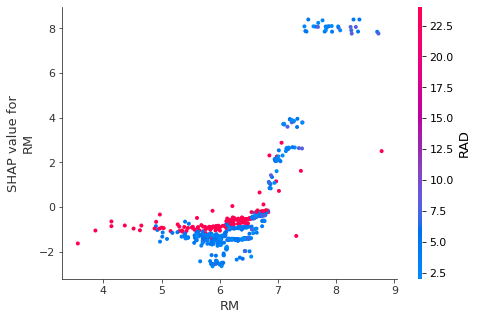

In [4]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

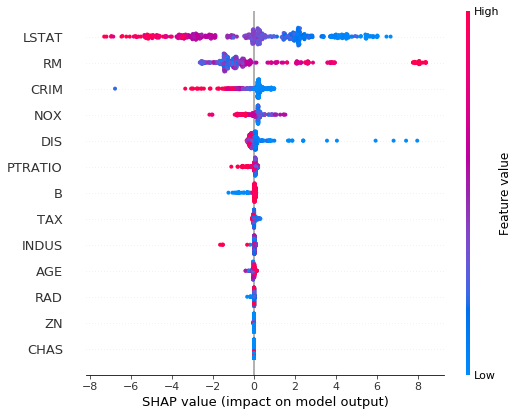

In [5]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

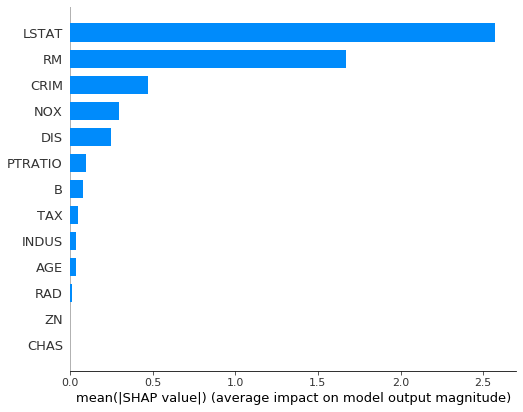

In [6]:
shap.summary_plot(shap_values, X, plot_type="bar")

## Shap 还是个玩具

在实际的使用过程中，这个工具在面对真实数据的情况下，需要很大的内存来支撑其相应的计算。如果数据集的维度很多，内存有限的情况下， Shap 包中的一些算法会提示无法分配足够的内存。在小维度数据上，可以使用 Shap，但是在真实的环境里，就不建议使用了。